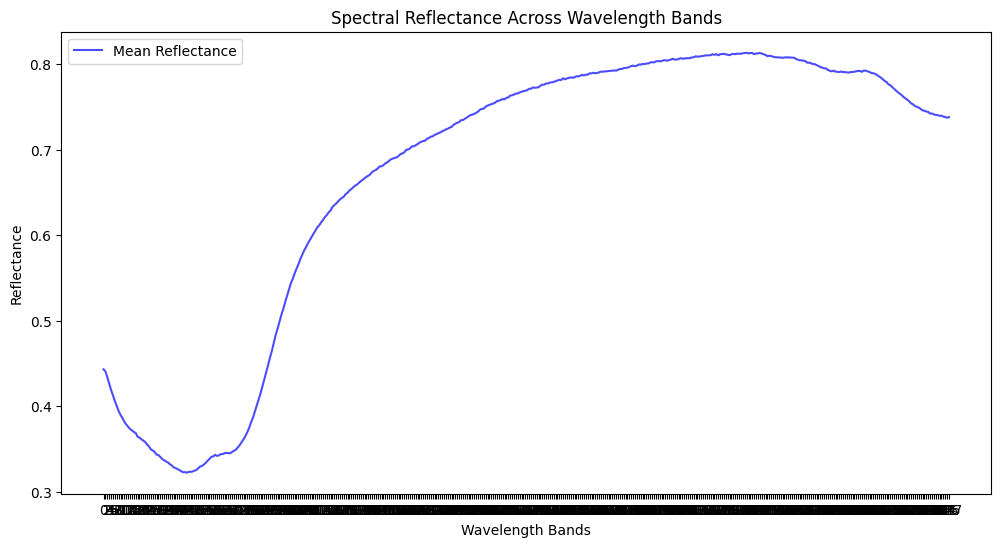

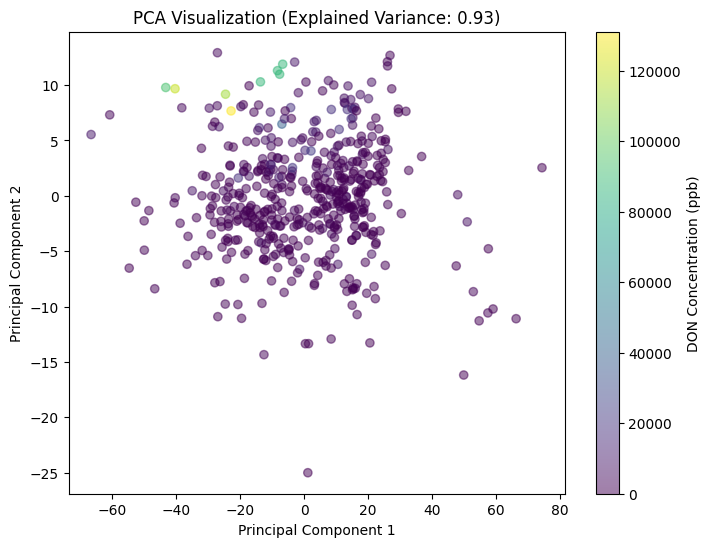

MAE: 1493.99, RMSE: 2825.67, R²: 0.97


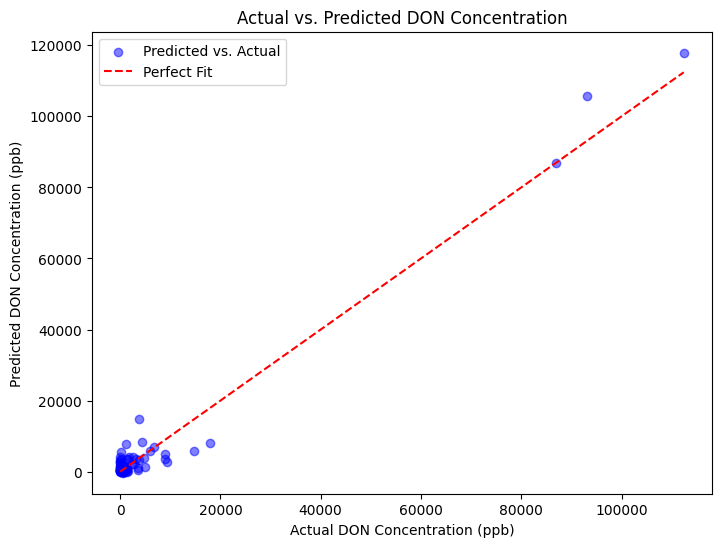

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the dataset
df = pd.read_csv("/content/TASK-ML-INTERN.csv")

df.drop(columns=['hsi_id'], inplace=True)  # Drop identifier column

# Extracting features and target
feature_columns = df.columns[:-1]  # Selecting all columns except last one
target_column = 'vomitoxin_ppb'
X = df[feature_columns].values
y = df[target_column].values

# Performing Data Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Visualizing spectral reflectance
plt.figure(figsize=(12, 6))
mean_reflectance = df[feature_columns].mean()
plt.plot(mean_reflectance, color='blue', alpha=0.7, label="Mean Reflectance")
plt.xlabel("Wavelength Bands")
plt.ylabel("Reflectance")
plt.title("Spectral Reflectance Across Wavelength Bands")
plt.legend()
plt.show()

# PCA for Dimensionality Reduction
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c=y, cmap='viridis')
plt.colorbar(label="DON Concentration (ppb)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"PCA Visualization (Explained Variance: {sum(explained_variance[:2]):.2f})")
plt.show()

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(pca_result, y, test_size=0.2, random_state=42)

# Training XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Performing Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs. Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label="Perfect Fit")
plt.xlabel("Actual DON Concentration (ppb)")
plt.ylabel("Predicted DON Concentration (ppb)")
plt.title("Actual vs. Predicted DON Concentration")
plt.legend()
plt.show()